In [23]:
!pip install pandas
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd

In [3]:
agriculture_production_df = pd.read_csv("../../Data/Merged Data.csv", index_col = "Date", parse_dates=True, usecols=["Date", "ABARES: Barley - Production ($M)","ABARES: Canola - Production ($M)","ABARES: Chickpeas - Production ($M)","ABARES: Eggs - Production ($M)","ABARES: Fruit (excluding grapes) - Production ($M)","ABARES: Grains, oilseeds and pulses - Production ($M)","ABARES: Milk - Production ($M)","ABARES: Vegetables - Production ($M)","ABARES: Wheat - Production ($M)","ABARES: Wine grapes - Production ($M)","ABARES: Wool - Production ($M)"])

australian_weather_df = pd.read_csv("../../Data/Quarterly Weather Data.csv", index_col="Date", parse_dates=True, usecols=["Date", "Rainfall Anomaly","Temperature Anomaly"])

ENSO_df = pd.read_csv("SOI_ONI_ENSO.csv", index_col="Date", parse_dates=True)

SST_df = pd.read_csv("../../Data/Merged Data.csv", index_col="Date", parse_dates=True, usecols = ["Date","NINO1+2_sst","NINO3_sst","NINO3.4_sst","NINO4_sst"])

from functools import reduce
working_df = reduce(lambda left,right: pd.merge(left,right,on=['Date'],
                                            how='inner'), [agriculture_production_df, australian_weather_df, ENSO_df, SST_df])

working_df.dropna(inplace=True)

In [4]:
print(working_df)

            ABARES: Barley - Production ($M)  \
Date                                           
1989-09-01                            708.80   
1989-12-01                            708.80   
1990-03-01                            568.30   
1990-06-01                            568.30   
1990-09-01                            568.30   
...                                      ...   
2020-12-01                           3728.47   
2021-03-01                           4185.66   
2021-06-01                           4185.66   
2021-09-01                           4185.66   
2021-12-01                           4185.66   

            ABARES: Canola - Production ($M)  \
Date                                           
1989-09-01                             24.20   
1989-12-01                             24.20   
1990-03-01                             28.30   
1990-06-01                             28.30   
1990-09-01                             28.30   
...                                    

In [ ]:
# def produce_ENSO_colours(ENSO, SOI):
    

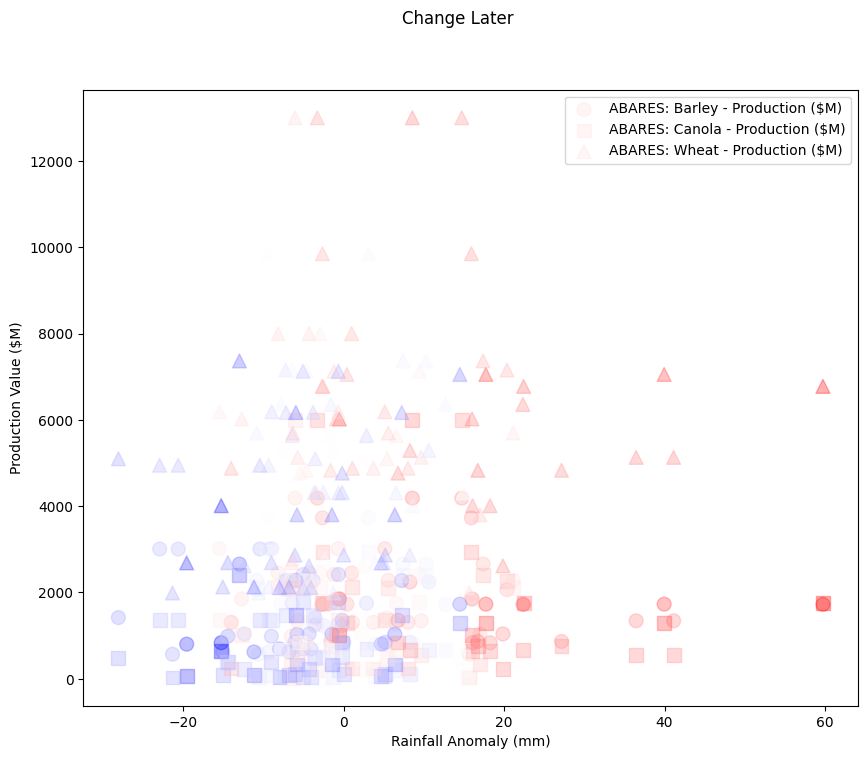

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Change Later')
ax = fig.add_subplot()

data = {
    "Rainfall Anomaly": working_df["Rainfall Anomaly"],
    "Barley Production ($M)": working_df["ABARES: Barley - Production ($M)"],
    "Canola Production ($M)": working_df["ABARES: Canola - Production ($M)"],
    "Wheat Production ($M)": working_df["ABARES: Wheat - Production ($M)"],
    "SOI": working_df["SOI"],

}

ax.scatter('Rainfall Anomaly', 'Barley Production ($M)', marker="o", s = 100, c ="SOI", cmap = "bwr", alpha = 0.3, data=data, )
ax.scatter('Rainfall Anomaly', 'Canola Production ($M)', marker="s", s = 100, c = "SOI", cmap = "bwr", alpha = 0.3, data=data)
ax.scatter('Rainfall Anomaly', 'Wheat Production ($M)', marker="^", s = 100, c = "SOI", cmap = "bwr", alpha=0.3, data=data)

ax.set_xlabel('Rainfall Anomaly (mm)')
ax.set_ylabel('Production Value ($M)')
plt.legend()

plt.show()

<Axes: xlabel='Rainfall Anomaly', ylabel='Barley Production ($M)'>

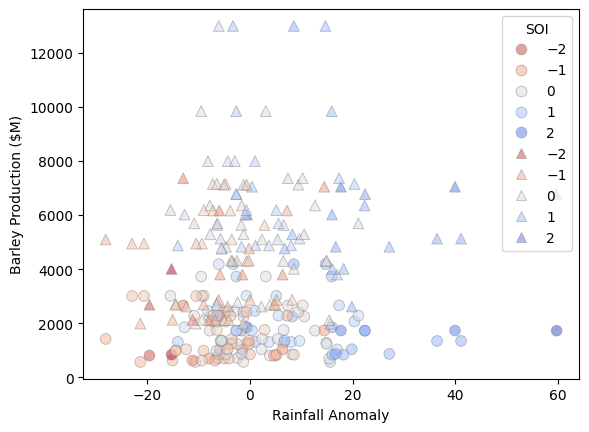

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib
import matplotlib.colors as mcolors


sns.scatterplot(data = data, x = "Rainfall Anomaly", y = "Barley Production ($M)", hue = "SOI", palette = "coolwarm_r", s = 60, marker="o", alpha = 0.5, edgecolor = "grey")
sns.scatterplot(data = data, x = "Rainfall Anomaly", y = "Wheat Production ($M)", hue = "SOI", palette = "coolwarm_r", s = 60, marker = "^", alpha=0.5, edgecolor = "grey")


In [ ]:
'''
    - Owen Y
        - Datasets
            - Original SST data (my part of Stage 1 pre-merge)
            - ENSO cycle data from NOAA [Link](https://psl.noaa.gov/enso/) 
            - SOI and ONI data using NOAA CPC [Link](https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt), [Link](https://www.cpc.ncep.noaa.gov/data/indices/soi)
                - Metadata: [ONI](https://data.noaa.gov/dataset/dataset/climate-prediction-center-cpcoceanic-nino-index/resource/466b8e88-5aea-476a-af49-285e88abc08e), [SOI](https://data.noaa.gov/dataset/dataset/climate-prediction-center-southern-oscillation-index/resource/6aade4a9-641f-42ce-8c76-10369ed3a190)
        - Summaries
            - Group by Nominal: 
                - Group by \[ENSO event\] Aggregate \[SOI/ONI\] using mean (to be specified)
            - Group by Binned Quantitative: 
                - Group by binned \[\] Aggregate \[\] using \[\] (to be determined)
        - Charts
            - Chart A: 3 attributes
                - Quadrant Scatter Plot
                    - Datapoints are different years
                - Rainfall (x-axis), Temperature (y-axis), Colour of Scatter Points (ENSO event)
            - Chart B: 
                - Line Plot
                    - Average Sea Surface Temperatures over time 
                    - 4 different lines for the different NINO.X regions
                - Date (x-axis), SST (y-axis)
            - Nominal or Ordinal: ENSO event
                - Chart A
            - Quantiative: Rainfall
                - Chart A
'''

In [6]:
australian_weather_df = pd.read_csv("../../Data/Quarterly Weather Data.csv", index_col="Date", parse_dates=True, usecols=["Date", "Rainfall Anomaly","Temperature Anomaly"])
ENSO_df = pd.read_csv("SOI_ONI_ENSO.csv", index_col="Date", parse_dates=True)

from functools import reduce
working_df = reduce(lambda left,right: pd.merge(left,right,on=['Date'],
                                            how='inner'), [agriculture_production_df, australian_weather_df, ENSO_df, SST_df])

working_df.dropna(inplace=True)


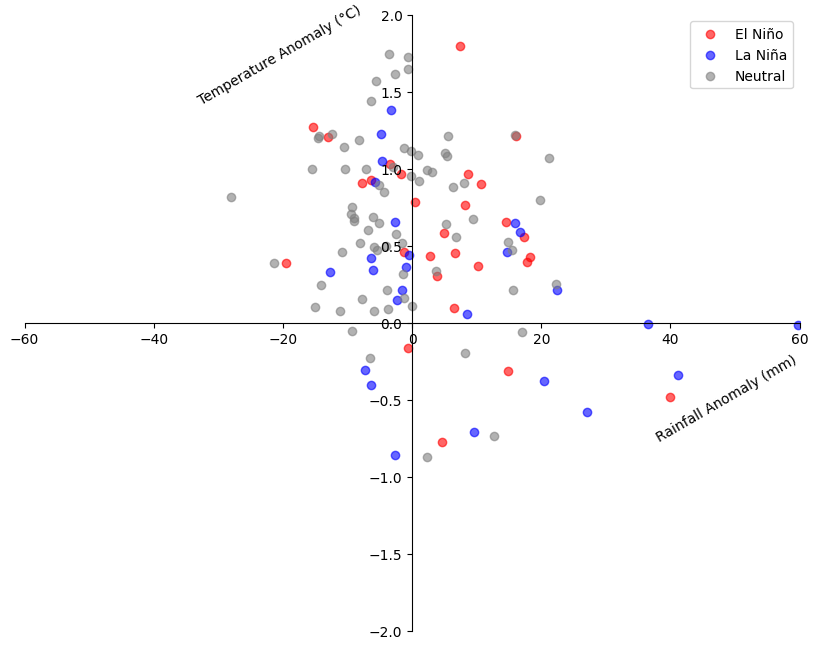

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
fig.suptitle('')
ax = fig.add_subplot()

ENSO_cmap = {"El Niño": "red", "La Niña": "blue", "Neutral": "gray"}

for ENSO in ["El Niño", "La Niña", "Neutral"]:
    ax.scatter(x=working_df[working_df["ENSO"] == ENSO]["Rainfall Anomaly"], y=working_df[working_df["ENSO"] == ENSO]["Temperature Anomaly"], c=ENSO_cmap[ENSO], label=ENSO, alpha=0.6)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xlabel('Rainfall Anomaly (mm)', loc="right", rotation=30)
ax.set_ylabel('Temperature Anomaly (°C)', loc="top", rotation=30)

ax.set_ylim([-2, 2])
ax.set_xlim([-60, 60])

ax.legend()
plt.show()

# M3

# If much more data was added, this visualisation would fail because the graph would be too crowded.
# one way to resolve this would be to group be decade and allow an interactive slider to slide between decades. This further allows visualisation of temporal trends
# Alternatively, a joint density visualisation could be used to abstract away the individual data points

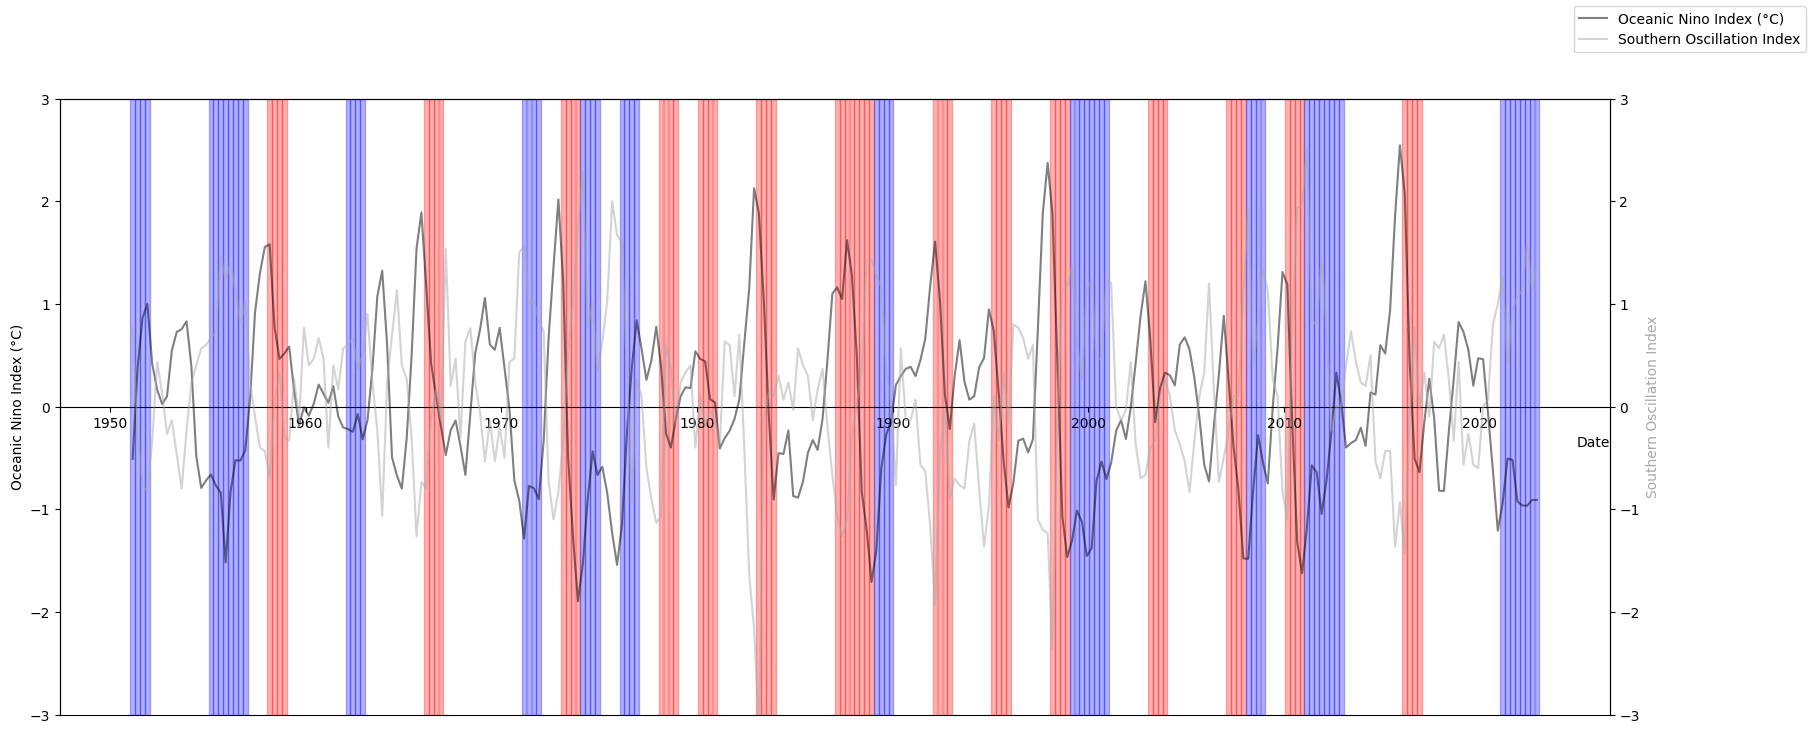

In [12]:
ENSO_df = pd.read_csv("SOI_ONI_ENSO.csv", index_col="Date", parse_dates=True)

working_df = ENSO_df


fig = plt.figure(figsize=(20, 8))
fig.suptitle('')
ax1 = fig.add_subplot()

ax2 = ax1.twinx()

ax1.plot(working_df["ONI"], color = "black", alpha=0.5, label="Oceanic Nino Index (°C)")
ax2.plot(working_df["SOI"], color="darkgray", alpha=0.5, label="Southern Oscillation Index")

ax1.set_xlabel('Date', loc="right")
ax1.set_ylabel('Oceanic Nino Index (°C)', color='black')
ax2.set_ylabel('Southern Oscillation Index', color='darkgray')

ax1.spines['bottom'].set_position('zero')

ax1.set_ylim([-3, 3])
ax2.set_ylim([-3, 3])

[ax1.axvspan(date-pd.Timedelta(days = 44.9) , date+pd.Timedelta(days = 44.9) , color="red", alpha=0.3) for date in working_df[working_df["ENSO"] == "El Niño"].index]
[ax1.axvspan(date-pd.Timedelta(days = 44.9) , date+pd.Timedelta(days = 44.9) , color="blue", alpha=0.3) for date in working_df[working_df["ENSO"] == "La Niña"].index]

legend = fig.legend()


ax1.spines['bottom'].set_position('zero')

# decisions
# colouring. Black for Oceanic Nino Index. Grey for Southern Oscillation Index
